# Demo on visualization
- plotting error masks
- plotting lineage
- stetching fluorescent video 

In [1]:
import sys
import os

# Append the directory of the module to the Python path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit")

In [2]:
from cell import Cell
import cells_extractor 
import visualizer
from cell_event import CellEvent, CellDefine, CellType
from link_composer import LinkComposer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap
from PIL import Image
import string
import cv2
import os
import matplotlib.patches as patches
import glob
import networkx as nx

**Plotting error mask**

In [4]:
mask_folder = "/Users/sherryyang/Documents/wiggins-lab/data/f/masks/*.png"
phase_folder = "/Users/sherryyang/Documents/wiggins-lab/data/f/phase/*c1.tif"
composer = LinkComposer.read_folder(mask_folder=mask_folder, phase_folder=phase_folder)

Frame:7, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:11, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:13, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:22, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


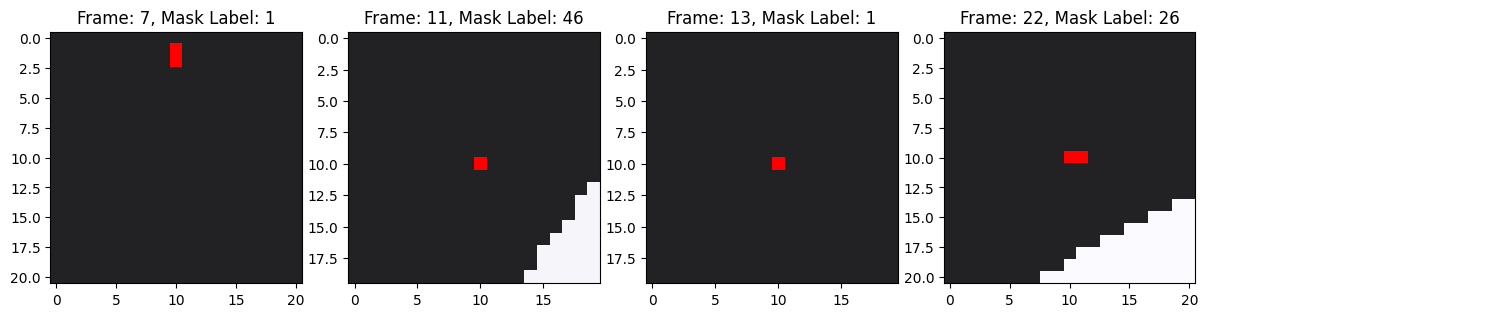

In [5]:
composer.show_mask_error()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import os
import glob

def make_single_thread_visualization(base_dir, Glist, frame, circle_label=False, representative_point=False):
    
    video_dir = os.path.join(base_dir, "video")
    os.makedirs(video_dir, exist_ok=True)

    
    filename = "*.tif"
    file_path = os.path.join(base_dir, filename)
    files = glob.glob(file_path)
    files.sort()

    n_cases = len(Glist)
    G_index = sorted(Glist)

    tag_dic, info_dic, pos_dic = {}, {}, {}
    for name, G in Glist.items():
        tag_dic[name] = visualizer.tag_type(G)
        info_dic[name] = visualizer.get_label_info(G)
        pos_dic[name] = visualizer.get_lineage_pos(G)

    # Master figure setup
    fig = plt.figure(figsize=(8 * n_cases, 10))  # Adjust the size as needed
    plt.axis('off')
    gs = gridspec.GridSpec(2, n_cases, height_ratios=[1, 5])  # 2 rows, n_cases columns
    composer = LinkComposer(Glist[G_index[1]])

    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 

    file = files[frame]
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_path = os.path.join(video_dir, f"frame{frame:05d}.png")
    for i in range(len(G_index)):
        name = G_index[i]
        G = Glist[name]
        
        tag = tag_dic[name]
        info = info_dic[name]
        pos = pos_dic[name]

        # First subplot for the lineage
        cell_s, edge_s, pos_even = visualizer.get_lineage_info_for_single_frame(G, frame, tag)
       
        ax2 = fig.add_subplot(gs[0, i])
        ax2 = sub_plot_lineage(ax2, G, pos, with_background=False, nodes_special=cell_s, edges_special=edge_s, arrow=True, show_stat=False)
        ax2.set_frame_on(False)
        ax1.set_axis_off() 

        # Second subplot for fluorescent image
        ax1 = fig.add_subplot(gs[1, i])
        ax1.imshow(image)
        ax1 = visualizer.get_single_frame_visualization(ax1, image, composer.cells_frame_dict, info, frame, circle_label, representative_point)
        ax1.set_axis_off() 
        ax1.set_title(name) 

    #plt.tight_layout()
    #plt.show()
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=False)

In [ ]:
import os
import glob

def delete_frames(input_directory, keep_every_nth_frame=5):
    """
    Delete frames in a sequence of TIFF images, keeping every nth frame.

    Args:
    input_directory (str): Directory containing TIFF images.
    keep_every_nth_frame (int): The interval of frames to keep (default is every 5th frame).
    """
    # List all TIFF images in the directory
    tiff_files = sorted(glob.glob(os.path.join(input_directory, "*.tif")))

    # Iterate through the files and delete as per the specified interval
    for i, file in enumerate(tiff_files):
        if (i % keep_every_nth_frame) != 0:  # If not a frame to keep, delete it
            os.remove(file)
            print(f"Deleted: {file}")

# Example usage
# Note: Replace 'your_directory_path' with the path to your directory containing TIFF images
# delete_frames('your_directory_path') 



In [ ]:
from PIL import Image

def keep_every_nth_frame(input_tif_path, output_tif_path, nth_frame=5):
    """
    Keep every nth frame in a multi-frame TIFF file.

    Args:
    input_tif_path (str): Path to the input multi-frame TIFF file.
    output_tif_path (str): Path for the output multi-frame TIFF file with reduced frames.
    nth_frame (int): The interval of frames to keep (default is every 5th frame).
    """
    with Image.open(input_tif_path) as img:
        frames_to_keep = []
        
        for i in range(0, img.n_frames, nth_frame):
            img.seek(i)
            frames_to_keep.append(img.copy())

        frames_to_keep[0].save(output_tif_path, save_all=True, append_images=frames_to_keep[1:])

# Example usage
# Note: Replace 'input.tif' and 'output.tif' with your input and output file paths
# keep_every_nth_frame('input.tif', 'output.tif')


In [ ]:
input_tif_path = "/Users/sherryyang/Documents/wiggins-lab/kevins-data/0_5_phase_align.tif"
output_tif_path =  "/Users/sherryyang/Documents/wiggins-lab/kevins-data/phase.tif"
keep_every_nth_frame(input_tif_path, output_tif_path, nth_frame=5)